Customer Churn means là tập dữ liệu về dự đoán sự hao hụt khách hàng tại ngân hàng

# 1.Thêm thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3.Xử lý dữ liệu

# 2.Đọc dữ liệu

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn Modeling.csv')
df = pd.read_csv('Churn-Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3.1.Xóa 3 cột RowNumber, CustomerId, Surname trong tập dữ liệu

In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace = True)
df.shape

(10000, 11)

## 3.2.Kiểm tra dữ liệu trống

In [4]:
df.isnull().values.any()

False

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 3.3.Kiểm tra outliers

In [6]:
numeric = df.select_dtypes(exclude='object')
cols_to_check = [col for col in numeric.columns if col not in ['y']]
cols_to_check

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

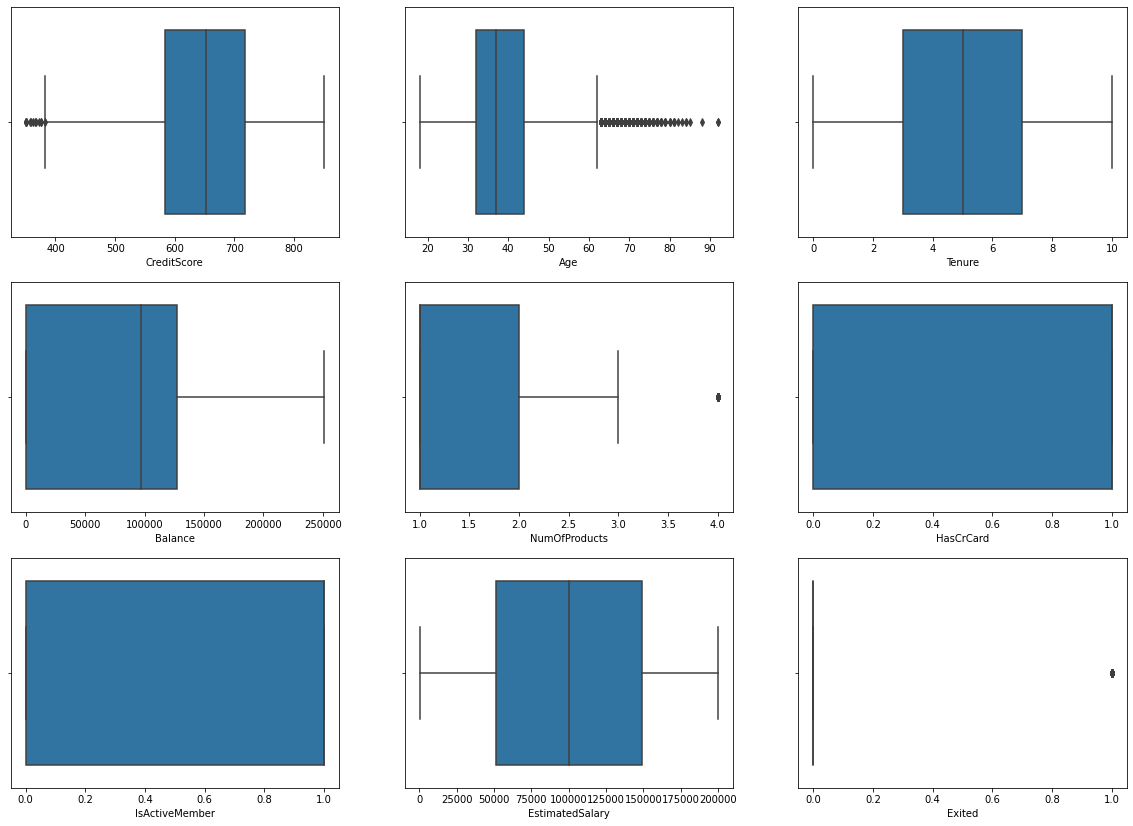

In [7]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numeric:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [8]:
#Xóa giá trị Age >= 75 tuổi
df = df[df['Age'] <= 75]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3.4.Sử dụng One Hot Coding chuyển đổi dữ liệu cho 2 cột Geography và Gender

In [9]:
df1 = pd.get_dummies(data = df,columns=['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# 4.Visualization

In [10]:
#Màu của plot
colors = ['#2BAE66','#FCF6F5']

## 4.1.Vẽ biểu đồ Plot cho mối quan hệ giữa 2 cột Age và Exit Status

C:\Users\kakac\AppData\Local\Temp\ipykernel_2008\3463370780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = [int(i/5) for i in df1['Age']]
posx and posy should be finite values
posx and posy should be finite values


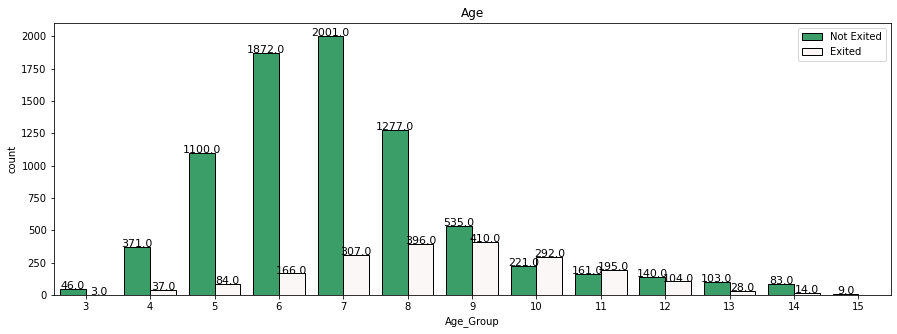

In [11]:
#Chia độ tuổi theo từng nhóm (nhóm tuổi = tuổi / 5)
df['Age_Group'] = [int(i/5) for i in df1['Age']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Age_Group', data = df, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Not Exited', 'Exited'], loc = 'upper right')
plt.title('Age');

## 4.2.Biểu đồ Plot hiển thị quan hệ giữa 2 cột Balance và Exit Status

C:\Users\kakac\AppData\Local\Temp\ipykernel_2008\4276216916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balance_Group'] = [int(i/20000) for i in df1['Balance']]
posx and posy should be finite values
posx and posy should be finite values


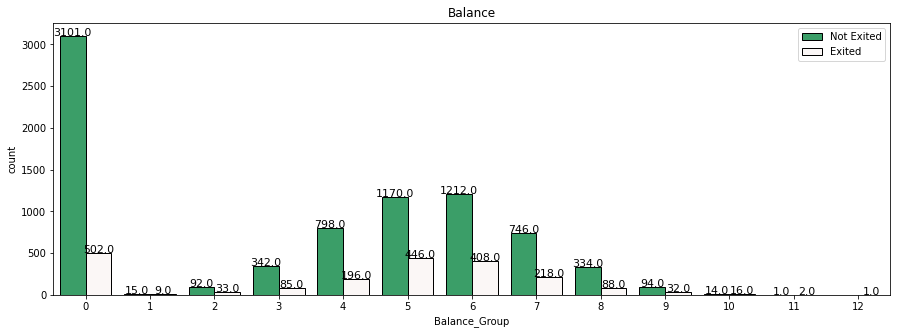

In [12]:
#Chia balance theo từng nhóm (nhóm tuổi = tuổi / 20000)
df['Balance_Group'] = [int(i/20000) for i in df1['Balance']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Balance_Group', data = df, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Not Exited', 'Exited'], loc = 'upper right')
plt.title('Balance');

## 4.3.Biểu đồ Plot hiển thị quan hệ giữa 2 cột Salary và Exit Status

C:\Users\kakac\AppData\Local\Temp\ipykernel_2008\560600149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimatedSalary_Group'] = [int(i/20000) for i in df1['EstimatedSalary']]


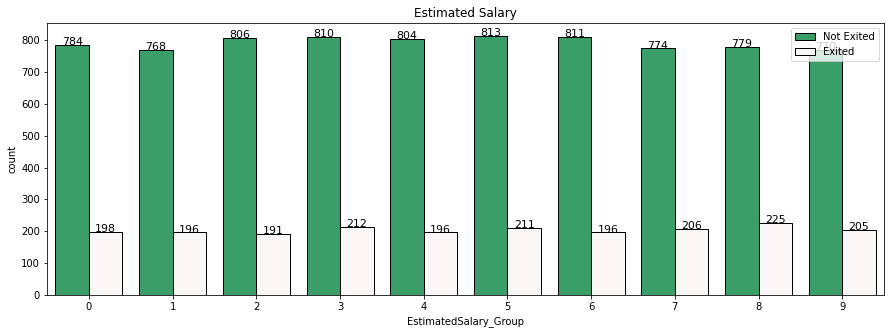

In [13]:
#Chia balance theo từng nhóm (nhóm tuổi = tuổi / 20000)
df['EstimatedSalary_Group'] = [int(i/20000) for i in df1['EstimatedSalary']]

plt.figure(figsize = (15,5))
ax = sns.countplot('EstimatedSalary_Group', data = df, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Not Exited', 'Exited'], loc = 'upper right')
plt.title('Estimated Salary');

## 4.4.Biểu đồ Plot cho mối quan hệ giữa 2 cột Geography và Exit Status


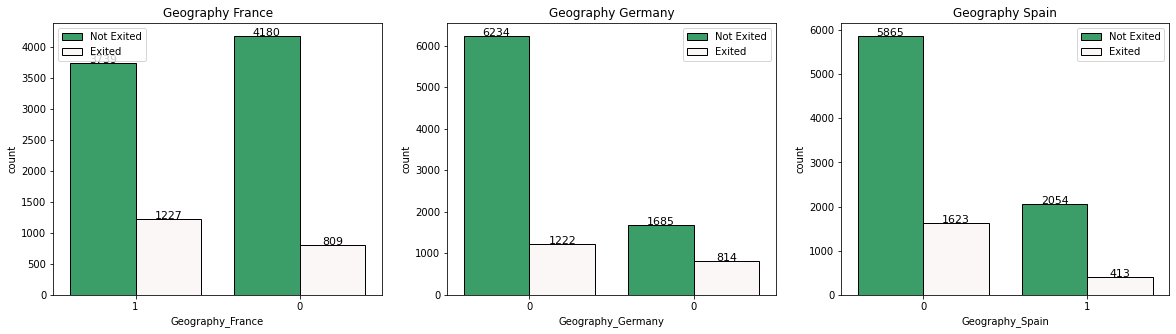

In [14]:
fig = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

plt.subplot(1,3,1)
ax = sns.countplot('Geography_France',data = df1, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(df1['Geography_France'][j] for j in sorted(df1['Geography_France'].unique()))
plt.legend(['Not Exited', 'Exited'])
plt.title('Geography France');

plt.subplot(1,3,2)
ax = sns.countplot('Geography_Germany',data = df1, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(df1['Geography_Germany'][j] for j in sorted(df1['Geography_Germany'].unique()))
plt.legend(['Not Exited', 'Exited'])
plt.title('Geography Germany');

plt.subplot(1,3,3)
ax = sns.countplot('Geography_Spain',data = df1, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(df1['Geography_Spain'][j] for j in sorted(df1['Geography_Spain'].unique()))
plt.legend(['Not Exited', 'Exited'])
plt.title('Geography Spain');

## 4.5.Biểu đồ Plot cho mối quan hệ giữa 2 cột HasCrCard và Exit Status


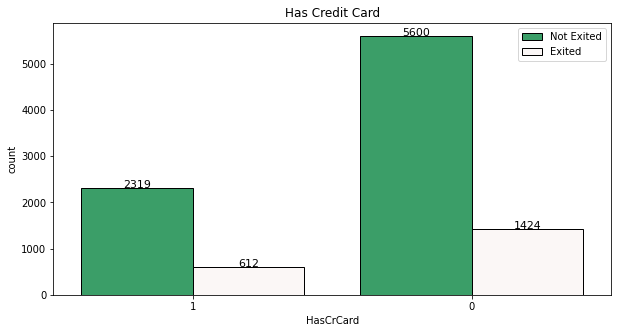

In [15]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

plt.subplot(1,1,1)
ax = sns.countplot('HasCrCard',data = df1, hue = 'Exited', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(df1['HasCrCard'][j] for j in sorted(df1['HasCrCard'].unique()))
plt.legend(['Not Exited', 'Exited'])
plt.title('Has Credit Card');

#### **Sử dụng MinMaxScaler để chuyển đổi dữ liệu cho 4 cột CreditScore, EstimatedSalary, Balance, Age**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['CreditScore','EstimatedSalary',
     'Balance','Age']] = scaler.fit_transform(
df1[['CreditScore','EstimatedSalary',
     'Balance','Age']])

#### **Tách dữ liệu vào X,Y sử dụng train_test_split**

In [17]:
X = df1.drop('Exited',axis = 1)
y = df1['Exited']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### **Import Tensorflow, keras và Format cho mô hình**

In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32,input_shape = (13,),activation='relu'),
     keras.layers.Dense(16,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

#### **Train**

In [20]:
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
249/249 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7554
Epoch 2/50
249/249 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.7963
Epoch 3/50
249/249 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8010
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.8106
Epoch 5/50
249/249 [==============================] - 1s 4ms/step - loss: 0.4237 - accuracy: 0.8149
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8206
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8245
Epoch 8/50
249/249 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8316
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8332
Epoch 10/50
249/249 [==============================] - 1s 4ms/step - loss: 0.3692 - accuracy: 0.8403

In [21]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8553


[0.345542311668396, 0.855349063873291]

**Độ chính xác khoảng 86%**

#### **Dự đoán trên Test Set và sử dụng Ma trận nhầm lẫn và Báo cáo phân loại để đánh giá hiệu suất của mô hình** 

In [22]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1584
           1       0.74      0.45      0.56       407

    accuracy                           0.86      1991
   macro avg       0.80      0.71      0.74      1991
weighted avg       0.84      0.86      0.84      1991



Text(33.0, 0.5, 'Truth')

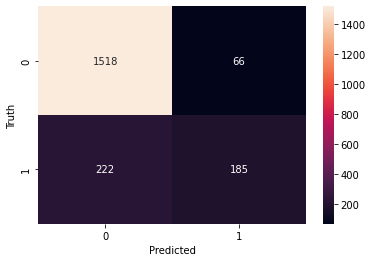

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
sn.heatmap(cm,annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')